In [1]:
import cv2
import numpy as np
import time
from matplotlib import pyplot as plt
from cartpole_lib_python import *

In [2]:
init_odrive()
init_odrive()

axis0
  active_errors: no error
  disarm_reason: no error
  procedure_result: ProcedureResult.SUCCESS
  last_drv_fault: none
internal issues: none
axis0
  active_errors: no error
  disarm_reason: no error
  procedure_result: ProcedureResult.SUCCESS
  last_drv_fault: none
internal issues: none
axis0
  active_errors: no error
  disarm_reason: no error
  procedure_result: ProcedureResult.SUCCESS
  last_drv_fault: none
internal issues: none
odrive initialized
axis0
  active_errors: no error
  disarm_reason: no error
  procedure_result: ProcedureResult.SUCCESS
  last_drv_fault: none
internal issues: none
axis0
  active_errors: no error
  disarm_reason: no error
  procedure_result: ProcedureResult.SUCCESS
  last_drv_fault: none
internal issues: none
axis0
  active_errors: no error
  disarm_reason: no error
  procedure_result: ProcedureResult.SUCCESS
  last_drv_fault: none
internal issues: none
odrive initialized


In [3]:
def busy_sleep(duration, loop_start, get_now=time.perf_counter):
    now = get_now()

    end = duration + loop_start

    while now < end:
        now = get_now()

In [3]:
vid = cv2.VideoCapture(1, cv2.CAP_DSHOW)
# vid.set(cv2.CAP_PROP_FPS, 30)
vid.set(cv2.CAP_PROP_FRAME_WIDTH, 320)
vid.set(cv2.CAP_PROP_FRAME_HEIGHT, 240)

# control_frequencies = [20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35]
control_frequencies = [30]
control_periods = []
loop_time_all = []
task_time_all = []
frames_all = []

for control_frequency in control_frequencies:
    # control_frequency = 20 # Hz
    control_period = 1/control_frequency
    control_periods.append(control_period)
    loop_time = []
    task_time = []
    frames = []


    i = 0

    # while(True):
    start = time.time()
    while i < control_frequency*5:
    # while i < 1:
        i = i + 1
        time_start = time.perf_counter()
        ret, frame = vid.read()
        if ret:
            frames.append(frame)
        else:
            print("no ret")
        
        # if recording:
        #     # save frame
        #     # cv2.putText(frame, "Recording", (10,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255))
        #     cv2.imshow('recording', frame)
        # else:
        # cv2.imshow('frame', frame)

        # if cv2.waitKey(1) & 0xFF == ord('q'):
        #     break
        # if cv2.waitKey(1) & 0xFF == ord('r'):
        #     recording = not recording
        #     print(recording)

        task_time.append(time.perf_counter() - time_start)
        busy_sleep(control_period, time_start)
        loop_time.append(time.perf_counter() - time_start)
    
    loop_time_all.append(loop_time)
    task_time_all.append(task_time)
    frames_all.append(frames)

    print("took {} seconds".format(time.time() - start))

# After the loop release the cap object q
vid.release() 
# Destroy all the windows 
cv2.destroyAllWindows() 

took 5.1004674434661865 seconds


In [4]:
print(len(frames))
for frame in frames:
    cv2.imshow('frame', frame)
    # cv2.waitKey(1)
    if cv2.waitKey(int(1000*control_period)) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()

150


Text(0.5, 0, 'iteration')

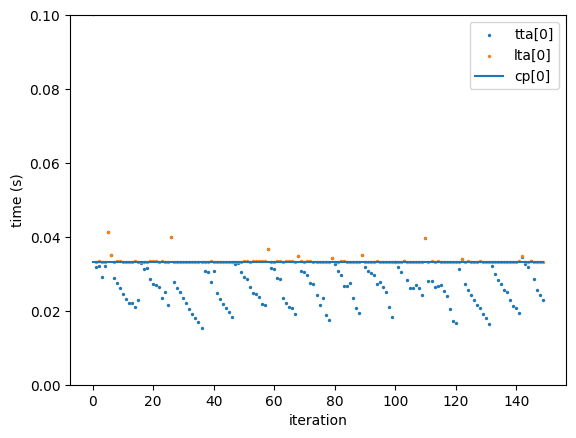

In [5]:
i = 0
# for task_time, loop_time, control_period in zip(task_time_all, loop_time_all, control_periods):
#     plt.plot(np.array(task_time))
#     plt.plot(np.array(loop_time))
#     plt.plot(np.array([control_period for _ in range(len(task_time))]))

plt.scatter(range(len(task_time_all[i])), np.array(task_time_all[i]), s=2)
plt.scatter(range(len(task_time_all[i])), np.array(loop_time_all[i]), s=2)
plt.plot(np.array([control_periods[i] for _ in range(len(task_time_all[i]))]))
    
plt.ylim([0,.1])
plt.legend(["tta[0]", "lta[0]", "cp[0]", "tta[1]", "lta[1]", "cp[1]"])
# plt.legend(["processing time", "total loop time", "control period"])
plt.ylabel("time (s)")
plt.xlabel("iteration")

In [6]:
np.average(np.array(task_time))

0.03226247419354835